In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering

In [2]:
#fetch the dataset
data_train = pd.read_csv('data.csv', index_col='Person_ID')
data_train.head()

,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area
Person_ID,,,,,,,
1,0,1,66278,3989,1,Con,Shenavan
2,0,0,64701,7076,1,Alphonso,Shubenka
3,1,1,28045,5659,1,Bordy,Chowṉêy
4,0,0,21690,6314,0,Margot,Pakxong
5,0,0,67479,9894,0,Denice,Ardazubre


In [3]:
data_train.Area.unique

<bound method Series.unique of Person_ID
1            Shenavan
2            Shubenka
3             Chowṉêy
4             Pakxong
5           Ardazubre
            ...      
1996           Salaza
1997         Danderyd
1998        Nowa Ruda
1999    Zhangguanying
2000          Canghou
Name: Area, Length: 2000, dtype: object>

In [4]:
data_train.shape

(2000, 7)

In [5]:
data_train.describe()

,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.499500,0.501000,60217.760000,5477.723500,0.506000
std,0.500125,0.500124,22785.967626,2610.025884,0.500089
min,0.000000,0.000000,20007.000000,1001.000000,0.000000
25%,0.000000,0.000000,40280.000000,3186.250000,0.000000
50%,0.000000,1.000000,60632.000000,5396.500000,1.000000
75%,1.000000,1.000000,80037.750000,7774.250000,1.000000
max,1.000000,1.000000,99998.000000,9993.000000,1.000000


In [6]:
correlation_matrix = data_train.corr().round(2)
correlation_matrix

,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts
Own_House,1.00,-0.01,0.05,0.00,0.02
Own_vehicle,-0.01,1.00,0.01,0.00,0.02
Monthly_Salary,0.05,0.01,1.00,0.02,-0.01
Standard_Savings,0.00,0.00,0.02,1.00,-0.03
Bank_Debts,0.02,0.02,-0.01,-0.03,1.00


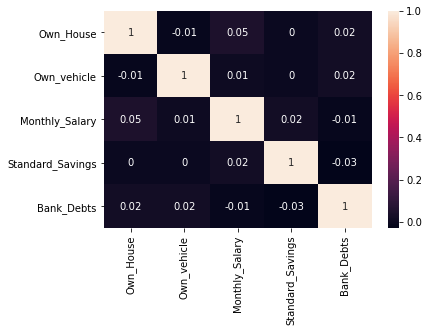

In [7]:
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
n_unique = data_train.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Own_House              2
Own_vehicle            2
Monthly_Salary      1974
Standard_Savings    1802
Bank_Debts             2
Name                1788
Area                 983
dtype: int64


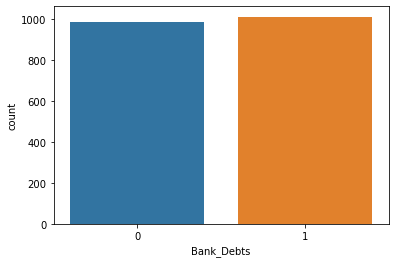

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x=data_train['Bank_Debts'],data=data_train)          #, palette='gist_earth_r')
plt.show()
plt.savefig('count_plot')

In [10]:
def scatters(data, h=None, pal=None, axs2=None , axs3=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Monthly_Salary",y="Standard_Savings", hue=h, palette=pal, data=data_train, ax=ax1)
    plt.tight_layout()

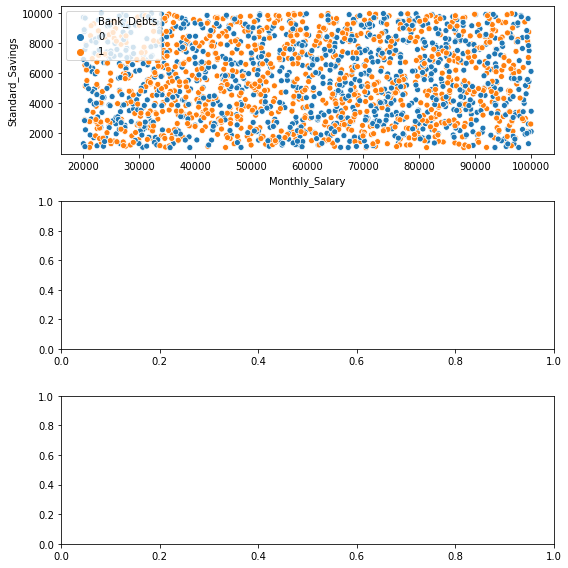

In [11]:
scatters(data_train, h="Bank_Debts", pal=None, axs2="Own_House", axs3="Own_vehicle")

C:\Users\pranj\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


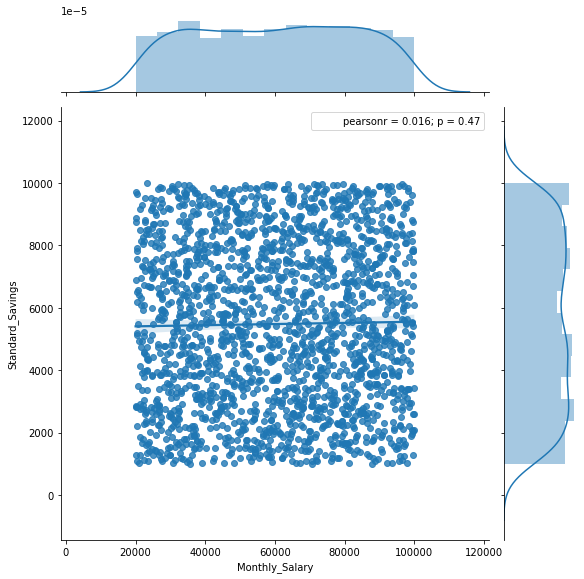

In [12]:
import scipy.stats as stats
r1 = sns.jointplot(x="Monthly_Salary",y="Standard_Savings", data=data_train, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

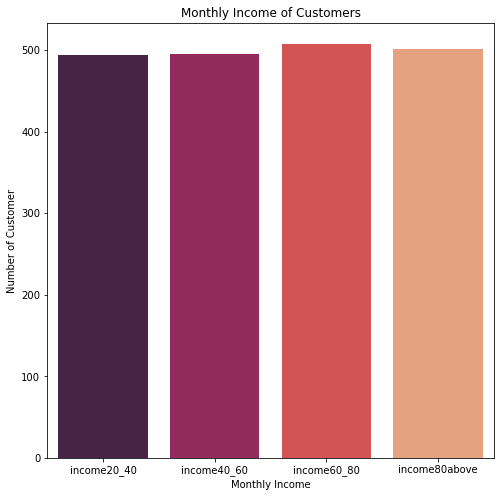

In [13]:
income20_40 = data_train.Monthly_Salary[(data_train.Monthly_Salary <= 40000) & (data_train.Monthly_Salary >= 20000)]
income40_60 = data_train.Monthly_Salary[(data_train.Monthly_Salary <= 60000) & (data_train.Monthly_Salary >= 40000)]
income60_80 = data_train.Monthly_Salary[(data_train.Monthly_Salary <= 80000) & (data_train.Monthly_Salary >= 60000)]
income80above = data_train.Monthly_Salary[data_train.Monthly_Salary >=80000]

x = ["income20_40","income40_60","income60_80","income80above"]
y = [len(income20_40.values),len(income40_60.values),len(income60_80.values),len(income80above.values)]

plt.figure(figsize=(8,8))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Monthly Income of Customers")
plt.xlabel("Monthly Income")
plt.ylabel("Number of Customer")
plt.show()

In [14]:
data_train = data_train.drop(['Name','Area','Own_vehicle'], axis=1)
data_train

,Own_House,Monthly_Salary,Standard_Savings,Bank_Debts
Person_ID,,,,
1,0,66278,3989,1
2,0,64701,7076,1
3,1,28045,5659,1
4,0,21690,6314,0
5,0,67479,9894,0
...,...,...,...,...
1996,0,54292,1468,1
1997,1,63079,7574,0
1998,1,69959,1788,1


In [15]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(data_train)
customers_normalized = scaler.transform(data_train)

In [16]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2)
principalComponents_data = pca_data.fit_transform(customers_normalized)

In [17]:
principal_data_train = pd.DataFrame(data = principalComponents_data
             , columns = ['principal component 1', 'principal component 2'])


Tried various clustering Algorithm like KMeans, KModes, Gowers and KPrototype, among which KPrototype gave the maximum accuracy as it handles the numerical and categorical data well.

In [18]:
def scatters(data, h=None, pal=None):
    fig, (ax1) = plt.subplots(1,1, figsize=(8,8))
    sns.scatterplot(x="Monthly_Salary",y="Standard_Savings", hue=h, palette=pal, data=data, ax=ax1)
    plt.tight_layout()

### Applying KMeans Clustering

In [19]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
data_train["Groups"] = model.labels_

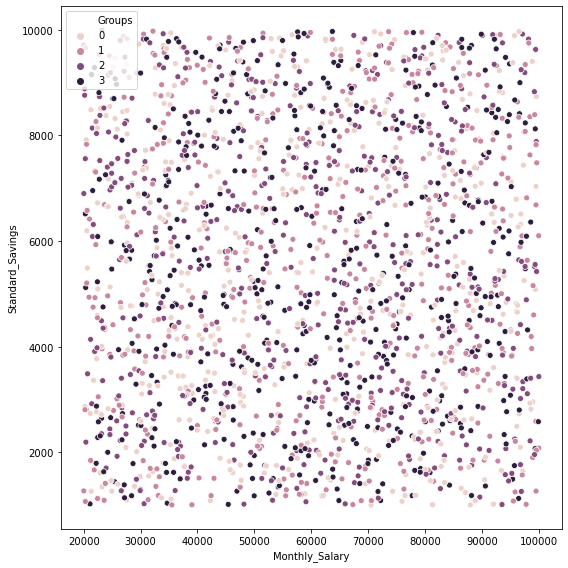

In [20]:
scatters(data_train, 'Groups')

### Applying KModes Clustering

In [21]:
from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(customers_normalized)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3987.0


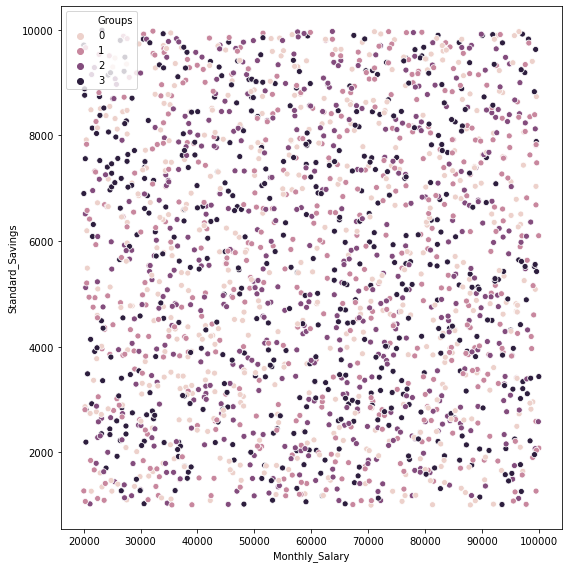

In [22]:
data_train["Groups"]=fitClusters_cao
scatters(data_train, 'Groups')

### Applying Gowers Model

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import gower

dm = gower.gower_matrix(customers_normalized)
Zd = linkage(dm) 

cld = fcluster(Zd, 4, criterion='maxclust')

<ipython-input-23-f142fc7bc70a>:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Zd = linkage(dm)


In [24]:
data_train["Cluster"] = cld

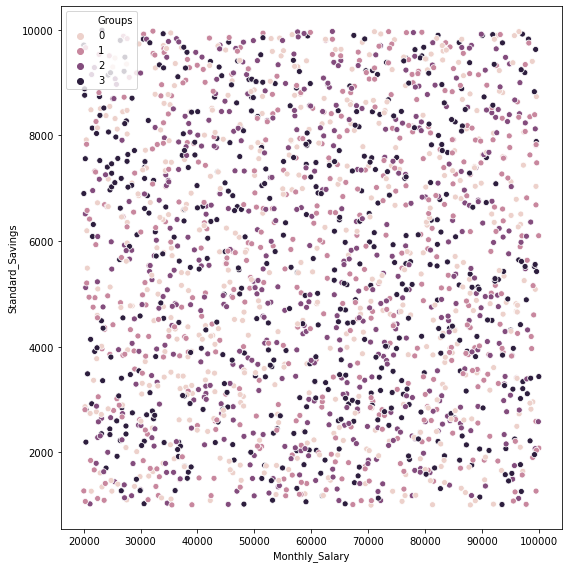

In [25]:
scatters(data_train, 'Groups')

### Applying KPrototypes Model

In [26]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=4, init='Huang', verbose=0, random_state=42,max_iter=20, n_init=50,n_jobs=-2,gamma=.25) 
clusters = kproto.fit_predict(customers_normalized, categorical=[0,3])

In [27]:
data_train["Groups"]=clusters
data_train


,Own_House,Monthly_Salary,Standard_Savings,Bank_Debts,Groups,Cluster
Person_ID,,,,,,
1,0,66278,3989,1,1,3
2,0,64701,7076,1,3,3
3,1,28045,5659,1,0,2
4,0,21690,6314,0,2,4
5,0,67479,9894,0,3,4
...,...,...,...,...,...,...
1996,0,54292,1468,1,0,3
1997,1,63079,7574,0,3,1
1998,1,69959,1788,1,1,2


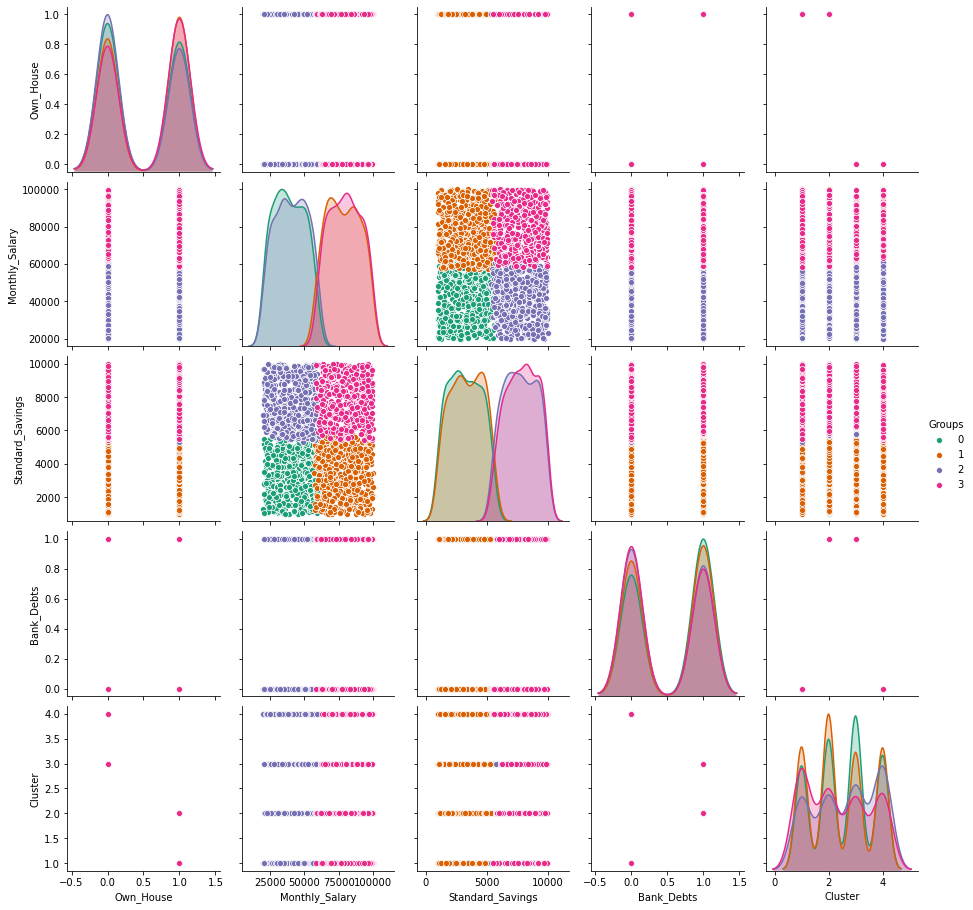

In [28]:
sns.pairplot(data_train,hue='Groups',palette='Dark2',diag_kind='kde')

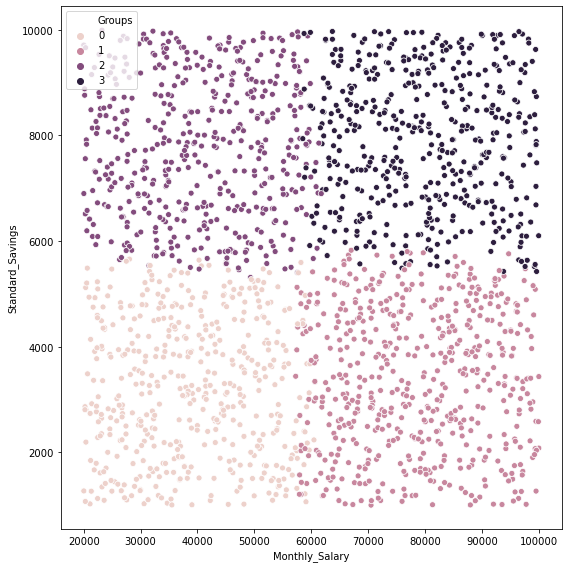

In [29]:
scatters(data_train, 'Groups')

In [30]:
#df = pd.DataFrame(data_train, columns= ['Groups'])
#df.to_csv (r'customer_cluster_kproto_wocat.csv', index = False, header=True)